In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cell_df = pd.read_csv('Traffic.csv')
#cell_df.head()

In [3]:
#Convertir la columna categorica "Day of the week" en numerica
days_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
cell_df['Day of the week'] = cell_df['Day of the week'].map(days_mapping)
#cell_df.head()

#Convertir la columna categorica "Traffic flow" en numerica
traffic_mapping = {'low': 0, 'normal': 1, 'high': 2, 'heavy' : 3}
cell_df['Traffic Situation'] = cell_df['Traffic Situation'].map(traffic_mapping)
#cell_df.head()


In [5]:
#Convertir la columna 'Time'(columna 0) formato datetime (hora real)
cell_df['Time'] = pd.to_datetime(cell_df['Time'])
cell_df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2025-11-03 00:00:00,10,1,31,0,4,4,39,0
1,2025-11-03 00:15:00,10,1,49,0,3,3,55,0
2,2025-11-03 00:30:00,10,1,46,0,3,6,55,0
3,2025-11-03 00:45:00,10,1,51,0,2,5,58,0
4,2025-11-03 01:00:00,10,1,57,6,15,16,94,1


In [6]:
# Convertir a hora decimal: hora + (minutos / 60) de x
cell_df['Time'] = cell_df['Time'].dt.hour + cell_df['Time'].dt.minute / 60
cell_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0.00,10,1,31,0,4,4,39,0
1,0.25,10,1,49,0,3,3,55,0
2,0.50,10,1,46,0,3,6,55,0
3,0.75,10,1,51,0,2,5,58,0
4,1.00,10,1,57,6,15,16,94,1


In [7]:
#
X = np.asarray(cell_df[['Time','Date','Day of the week','CarCount','BikeCount','BusCount','TruckCount','Total']])
X[0:5]

array([[ 0.  , 10.  ,  1.  , 31.  ,  0.  ,  4.  ,  4.  , 39.  ],
       [ 0.25, 10.  ,  1.  , 49.  ,  0.  ,  3.  ,  3.  , 55.  ],
       [ 0.5 , 10.  ,  1.  , 46.  ,  0.  ,  3.  ,  6.  , 55.  ],
       [ 0.75, 10.  ,  1.  , 51.  ,  0.  ,  2.  ,  5.  , 58.  ],
       [ 1.  , 10.  ,  1.  , 57.  ,  6.  , 15.  , 16.  , 94.  ]])

In [8]:
y = np.asarray(cell_df['Traffic Situation'])
y[0:5]

array([0, 0, 0, 0, 1])

In [ ]:
AAAAAAAAAAAAAAAAAAAAA

In [9]:
# Definir el modelo del perceptron
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(8,)))
model.add(tf.keras.layers.Dense(12, activation='sigmoid'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [10]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


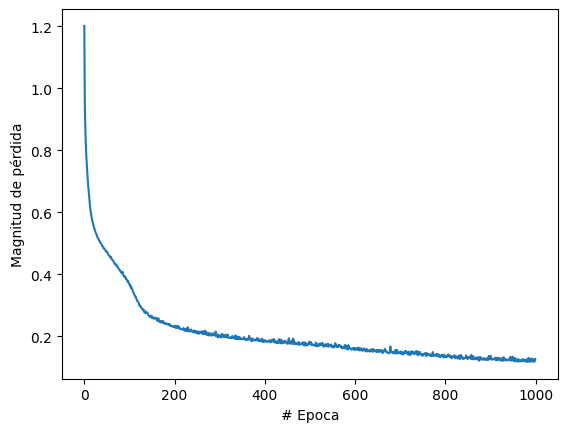

In [11]:
# Entrenamiento
historial = model.fit(X, y, epochs=1000, verbose=False)
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

In [ ]:
# Realizar una prediccion
predicted_probabilities = model.predict(np.array([[2.25, 10, 1, 76, 15, 32, 17, 140]])) #Registro de fila 59
predicted_class = np.argmax(predicted_probabilities)

#Convertir la variable predictect_class de numerica a categorica
predicted_class = list(traffic_mapping.keys())[list(traffic_mapping.values()).index(predicted_class)]
print("Clase predicha:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Clase predicha: high


In [ ]:
# Realizar una prediccion
predicted_probabilities = model.predict(np.array([[0.00, 10, 1, 13, 2, 2, 24, 41]])) # Registro de fila 2
predicted_class = np.argmax(predicted_probabilities)

#Convertir la variable predictect_class de numerica a categorica
predicted_class = list(traffic_mapping.keys())[list(traffic_mapping.values()).index(predicted_class)]
print("Clase predicha:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Clase predicha: normal


In [ ]:
# Realizar una prediccion
predicted_probabilities = model.predict(np.array([[8.00, 10, 1, 134, 18, 21, 1, 184]])) #Registro de fila 34
predicted_class = np.argmax(predicted_probabilities)

#Convertir la variable predictect_class de numerica a categorica
predicted_class = list(traffic_mapping.keys())[list(traffic_mapping.values()).index(predicted_class)]
print("Clase predicha:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Clase predicha: heavy


In [ ]:
# Realizar una prediccion
predicted_probabilities = model.predict(np.array([[1.25, 10, 1, 73, 15, 3, 17, 108]])) #Registro de fila 55
predicted_class = np.argmax(predicted_probabilities)

#Convertir la variable predictect_class de numerica a categorica
predicted_class = list(traffic_mapping.keys())[list(traffic_mapping.values()).index(predicted_class)]
print("Clase predicha:", predicted_class)
#FALLÓ

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Clase predicha: normal


In [ ]:
# Realizar una prediccion
predicted_probabilities = model.predict(np.array([[4.50, 12, 4, 61, 5, 0, 11, 77]])) #Registro de fila 212
predicted_class = np.argmax(predicted_probabilities)

#Convertir la variable predictect_class de numerica a categorica
predicted_class = list(traffic_mapping.keys())[list(traffic_mapping.values()).index(predicted_class)]
print("Clase predicha:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Clase predicha: low
